## Install YOLOv8

In [1]:
!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.8.19 torch-2.4.0 CPU
Setup complete ✅ (8 CPUs, 8.0 GB RAM, 111.6/228.3 GB disk)


In [2]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics 

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Custom Training

In [4]:
!yolo task=segment mode=train model=yolov8s-seg.pt data=/Users/rahulsharma/Developer/Python/cellSegmentation/cellSegmentation/data.yaml epochs=10 imgsz=640 save=true

/opt/anaconda3/envs/cellSegmentation/lib/python3.8/site-packages/ultralytics/nn/tasks.py:336: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_locat

In [6]:
!ls runs/segment/train2/

BoxF1_curve.png
BoxPR_curve.png
BoxP_curve.png
BoxR_curve.png
MaskF1_curve.png
MaskPR_curve.png
MaskP_curve.png
MaskR_curve.png
args.yaml
confusion_matrix.png
events.out.tfevents.1723823814.Rahuls-MacBook-Air.local.17819.0
results.csv
results.png
train_batch0.jpg
train_batch1.jpg
train_batch2.jpg
val_batch0_labels.jpg
val_batch0_pred.jpg
weights


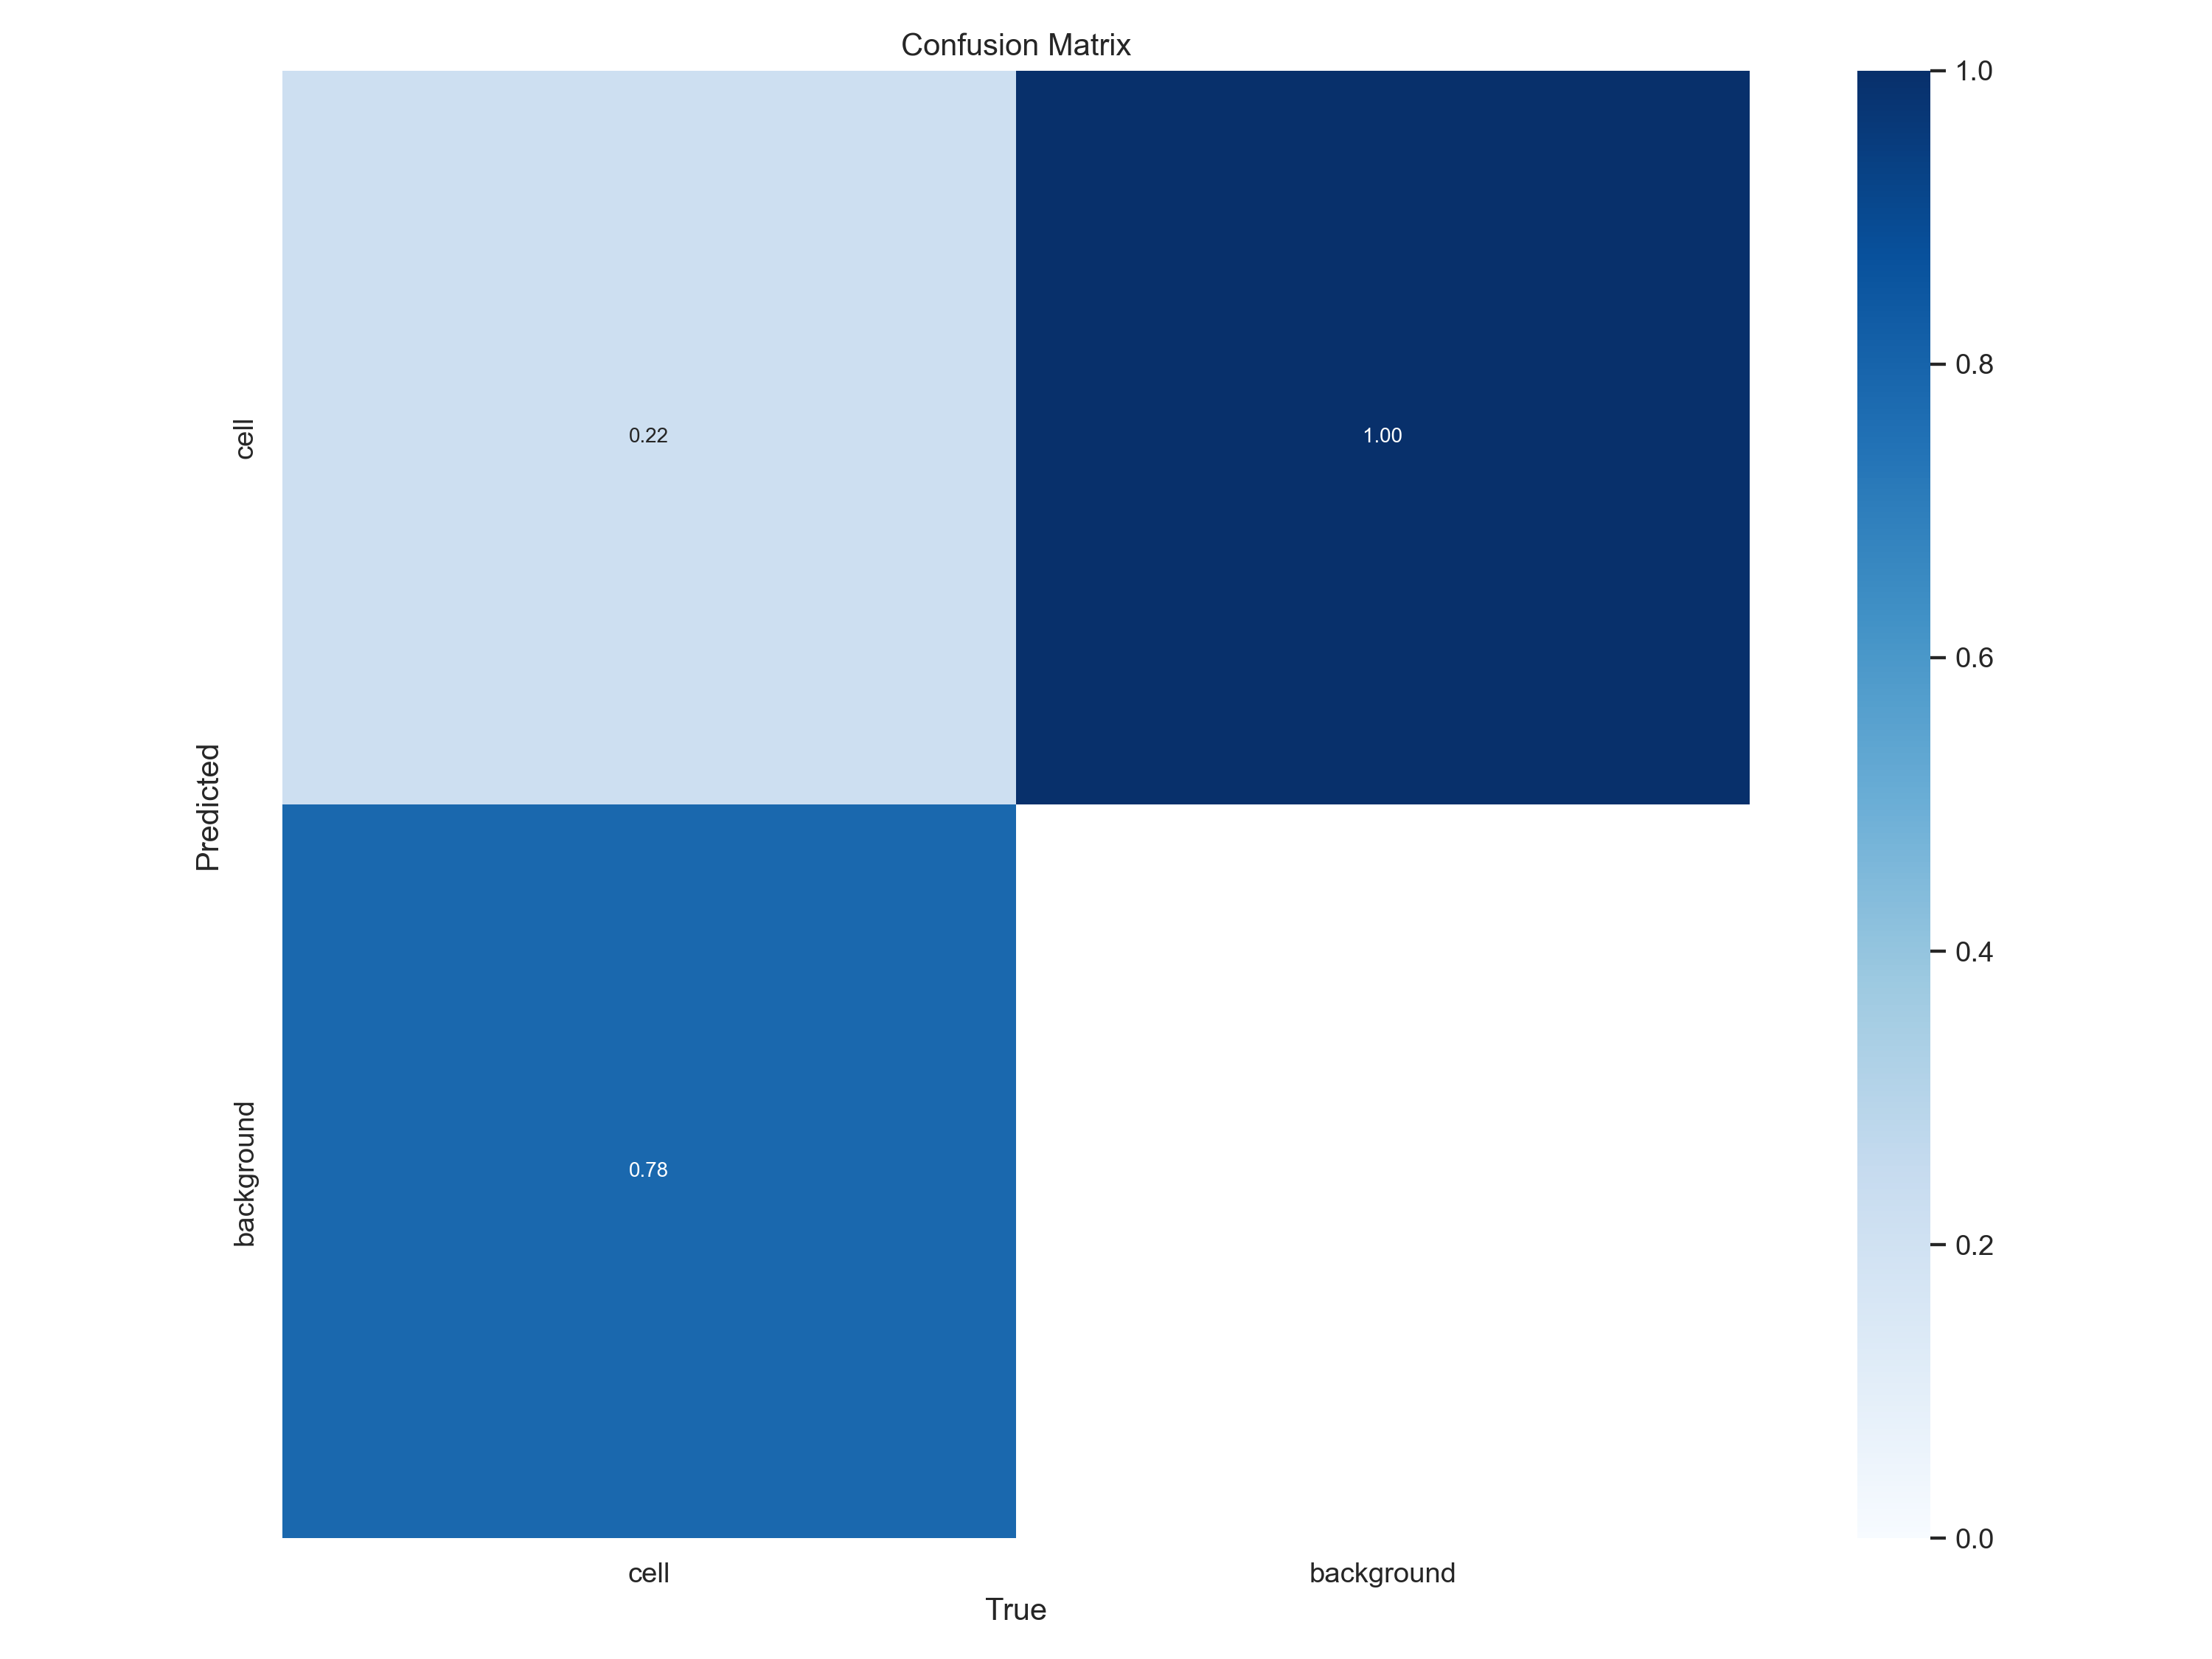

In [8]:
Image(filename=f'runs/segment/train2/confusion_matrix.png', width=600)

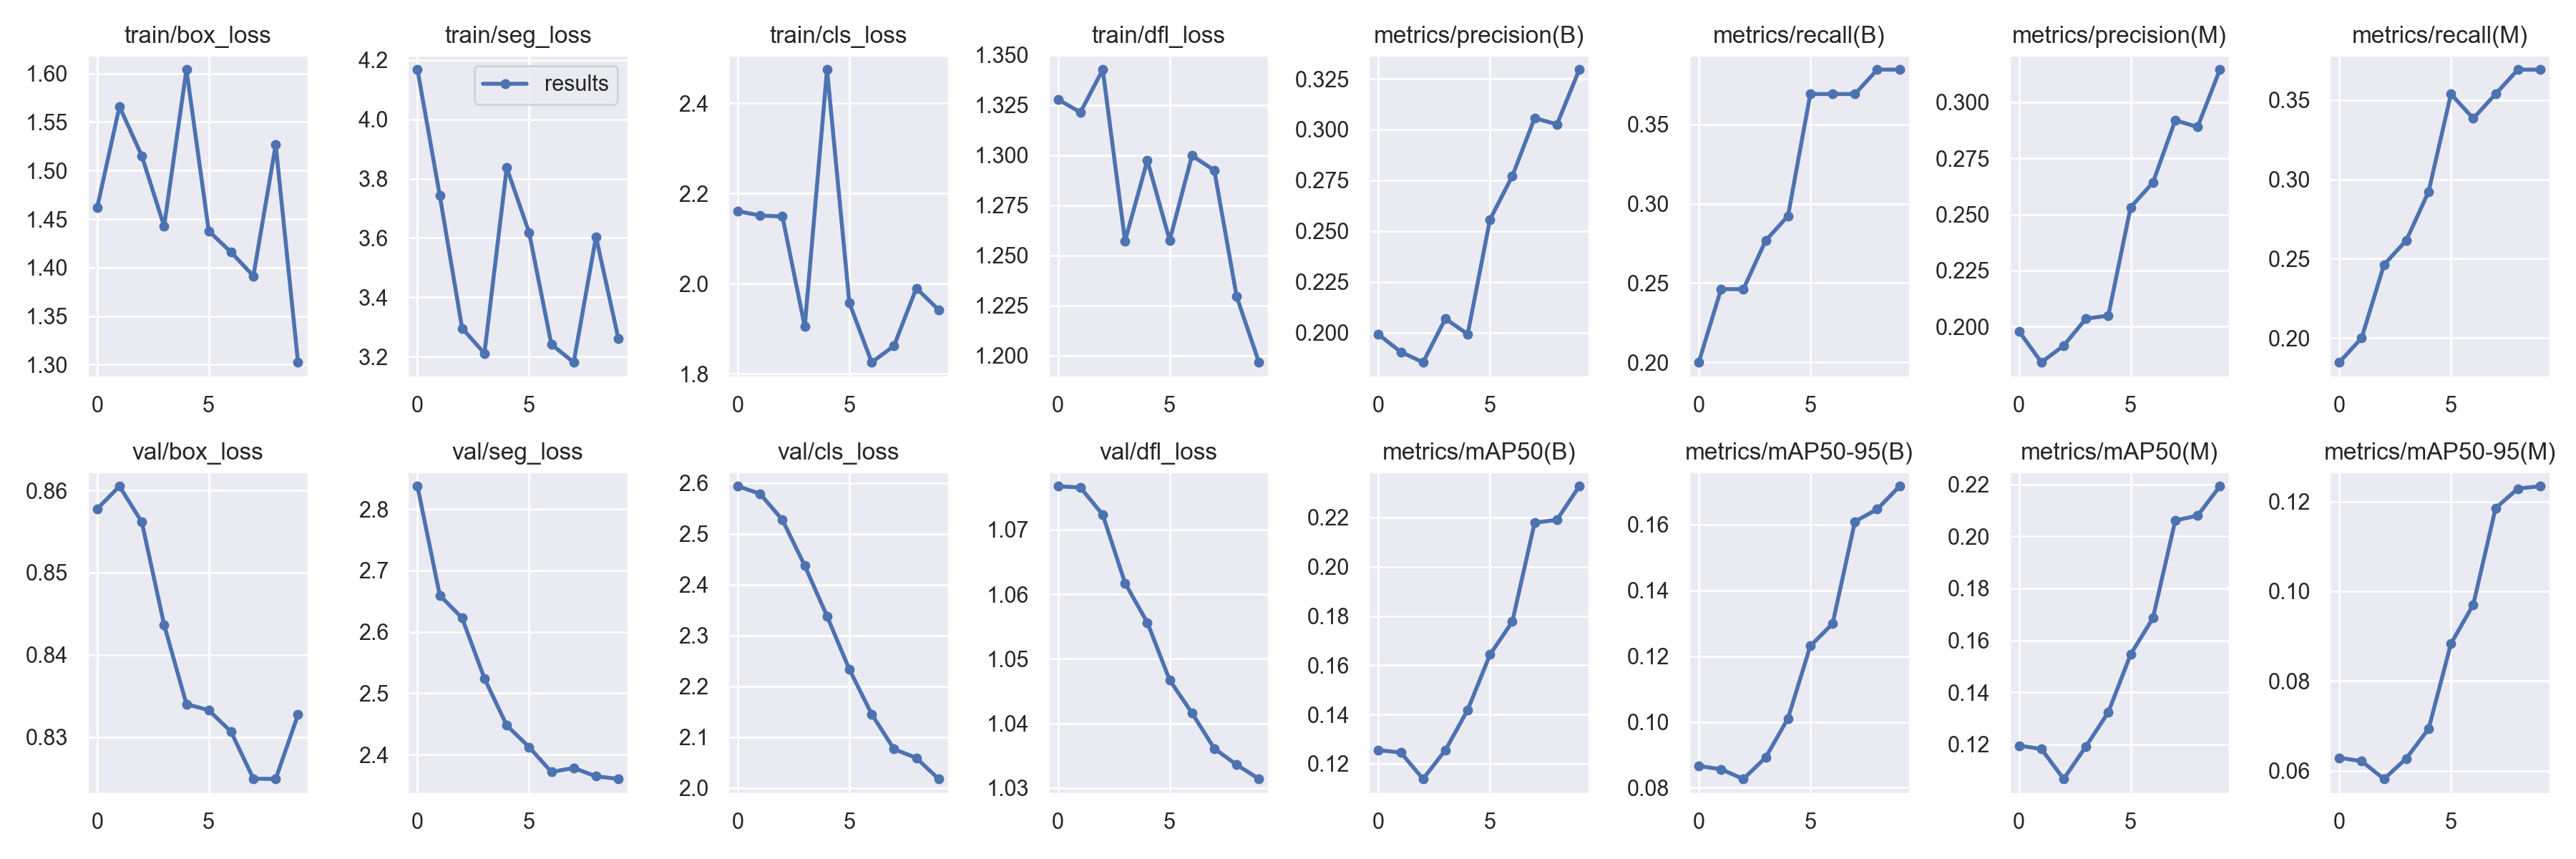

In [9]:
Image(filename=f'runs/segment/train2/results.png', width=600)

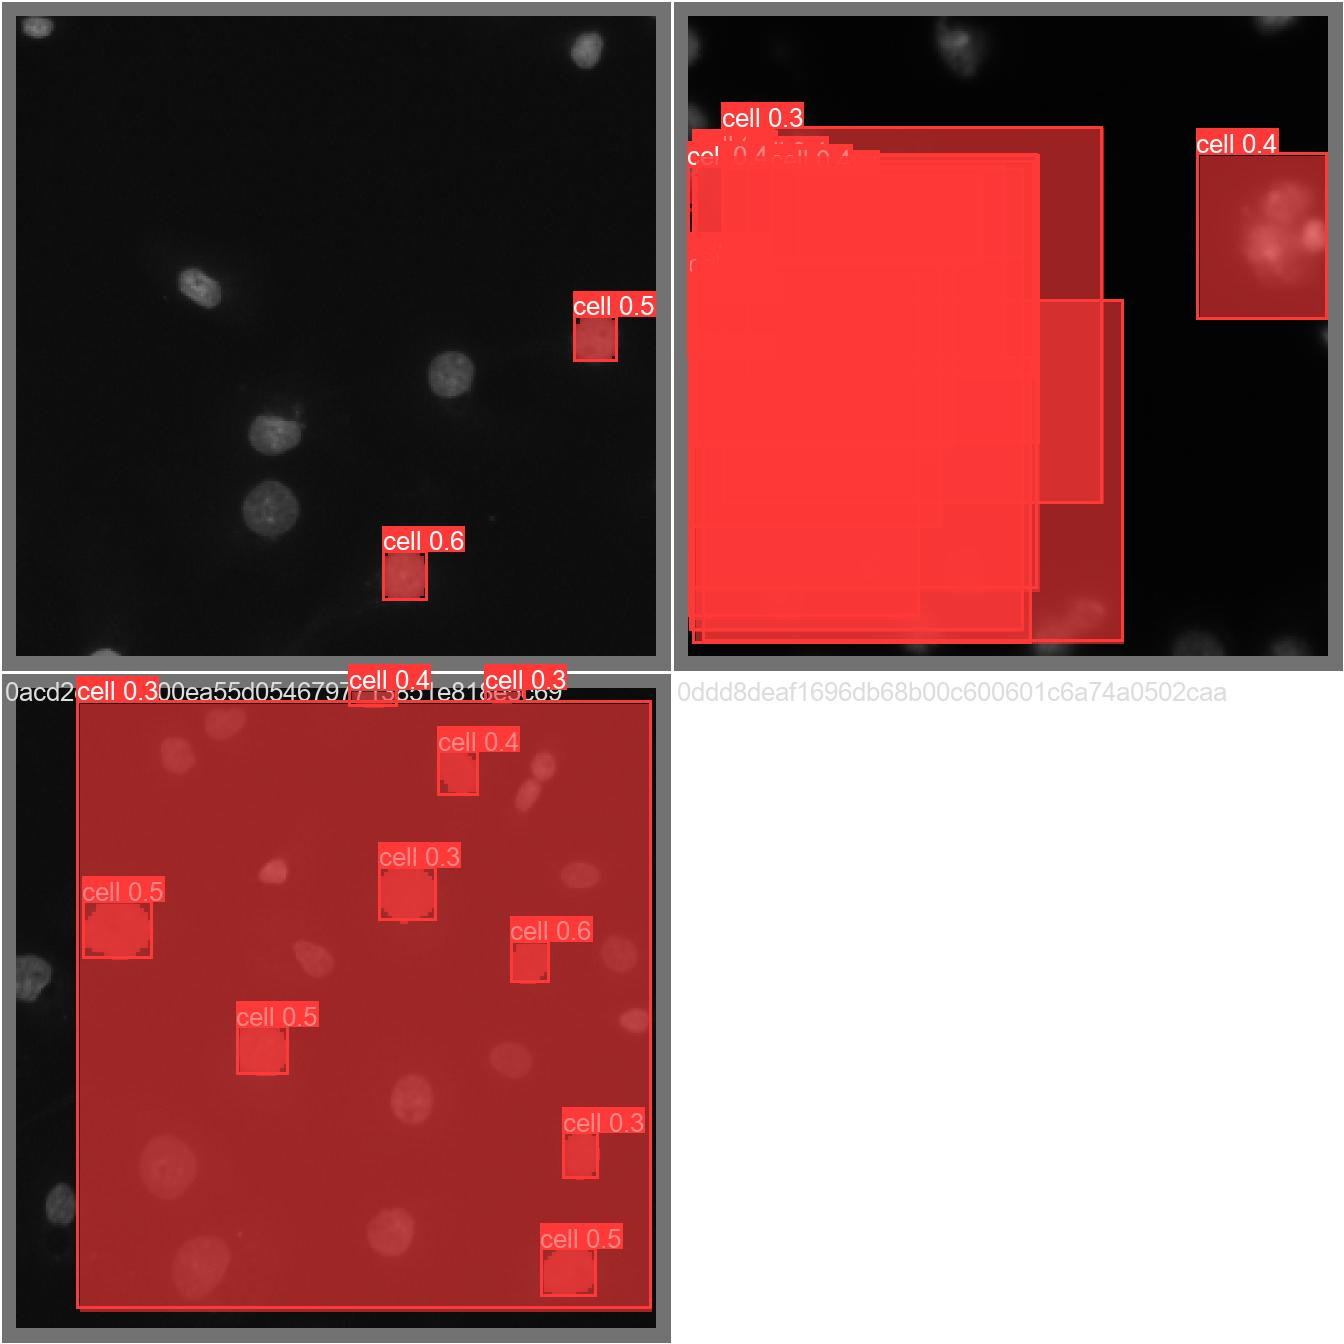

In [10]:
Image(filename=f'runs/segment/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [12]:
!yolo task=segment mode=val model=runs/segment/train2/weights/best.pt data=cellSegmentation/data.yaml

/opt/anaconda3/envs/cellSegmentation/lib/python3.8/site-packages/ultralytics/nn/tasks.py:336: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_locat

## Inference with Custom Model

In [15]:
!yolo task=segment mode=predict model=runs/segment/train2/weights/best.pt conf=0.25 source=cellSegmentation/test/images save=true

/opt/anaconda3/envs/cellSegmentation/lib/python3.8/site-packages/ultralytics/nn/tasks.py:336: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_locat

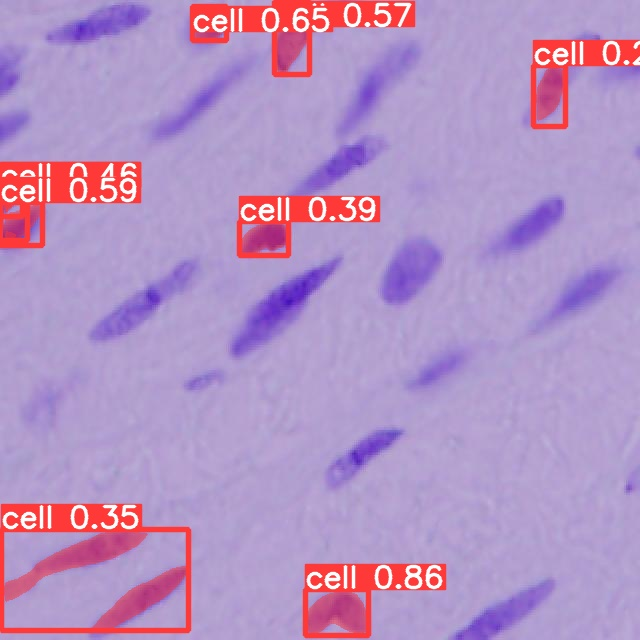

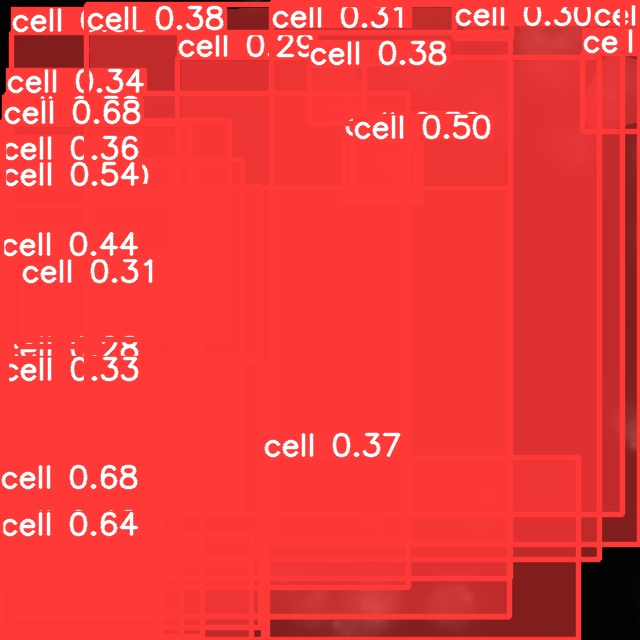

In [16]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/segment/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")